In [82]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [83]:
df = pd.read_csv("Titanic-Dataset.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [86]:
df.duplicated().sum()

0

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [89]:
df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


# EDA

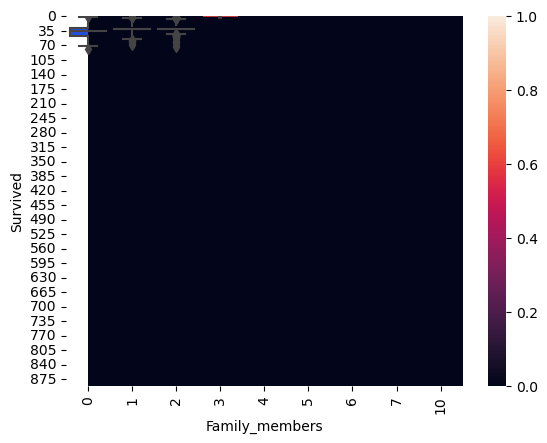

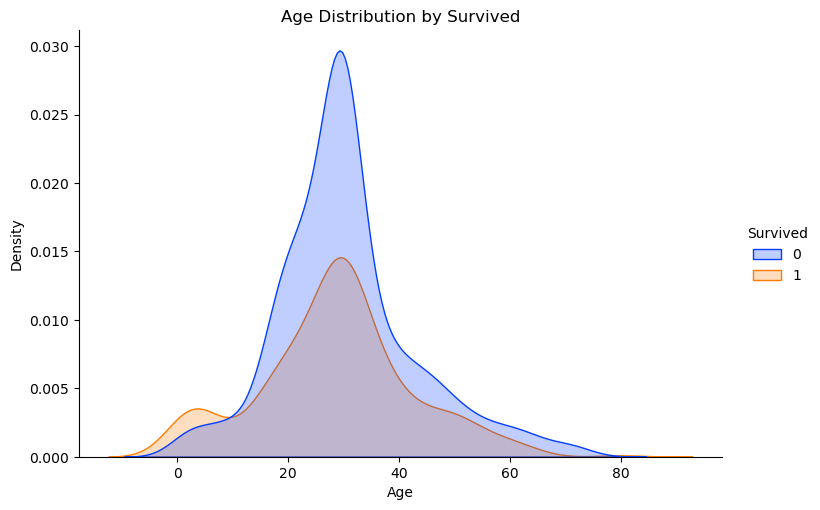

In [90]:
sb.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Age Distribution by Survived')
plt.show()

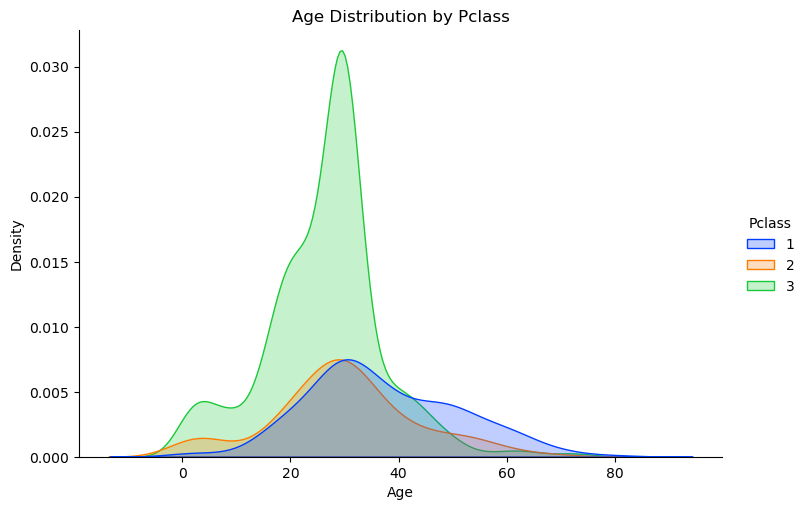

In [91]:
sb.displot(data=df, x='Age', hue='Pclass', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.show()

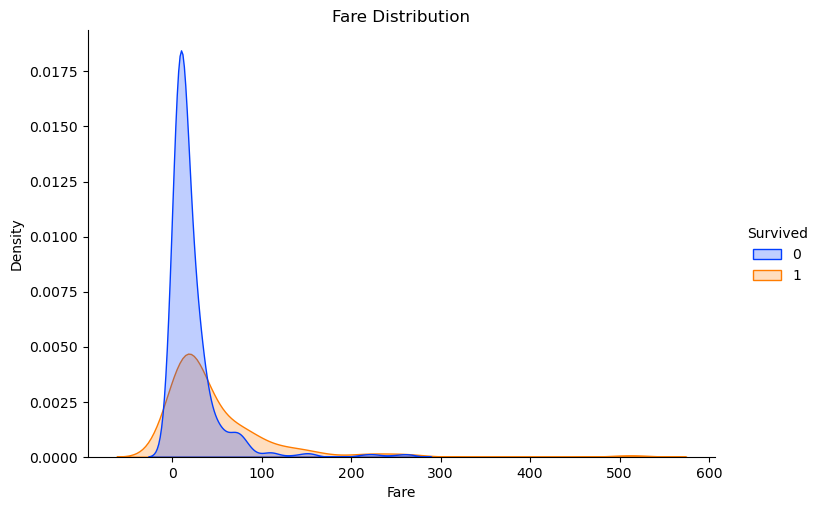

In [92]:
sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Fare Distribution')
plt.show()

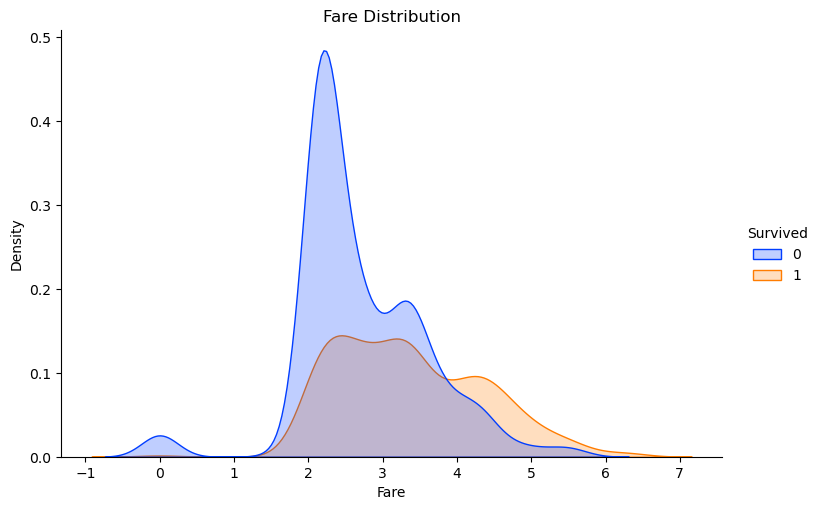

In [93]:
#Fare Transformation (Log)
df['Fare_org']=df['Fare']
df['Fare'] = np.log(df['Fare']+1)
sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Fare Distribution')
plt.show()

# Training

In [94]:
train_df = df.sample(frac=0.7, random_state=25)
test_df = df.drop(train_df.index)

In [95]:
train_df.head()

# input split
X = train_df.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_df['Survived']

In [96]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_org
760,3,"Garfirth, Mr. John",male,29.699118,0,0,358585,2.740840,NaN,S,14.5000
773,3,"Elias, Mr. Dibo",male,29.699118,0,0,2674,2.107178,NaN,C,7.2250
266,3,"Panula, Mr. Ernesti Arvid",male,16.000000,4,1,3101295,3.705921,NaN,S,39.6875
507,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,29.699118,0,0,111427,3.316003,NaN,S,26.5500
524,3,"Kassem, Mr. Fared",male,29.699118,0,0,2700,2.107689,NaN,C,7.2292


In [97]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

# Survived people by Class

In [98]:
survived_class=df.groupby('Pclass')['Survived'].count()
survived_class.to_frame('Survivers')

,Survivers
Pclass,
1,216
2,184
3,491


In [99]:
df['Family_members']=df['Parch']+df['SibSp']
df['Family_members']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_members, Length: 891, dtype: int64

In [100]:
sns.barplot(x =df['Family_members'], y =df['Survived'])

<AxesSubplot:xlabel='Family_members', ylabel='Survived'>

In [101]:
survived_people=df.groupby('Survived').median()
survived_people

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fare_org,Family_members
Survived,,,,,,,,
0,455.0,3.0,29.699118,0.0,0.0,2.442347,10.5,0.0
1,439.5,2.0,29.699118,0.0,0.0,3.295837,26.0,1.0


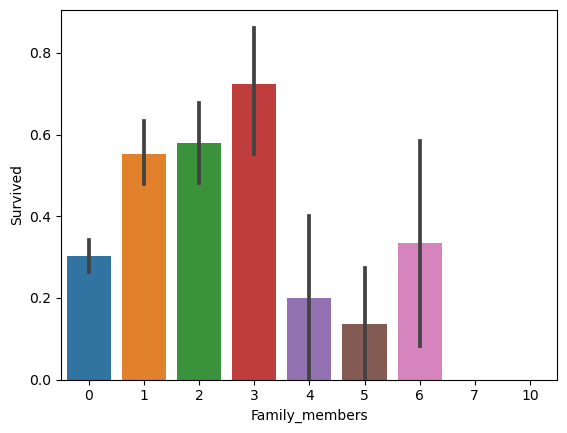

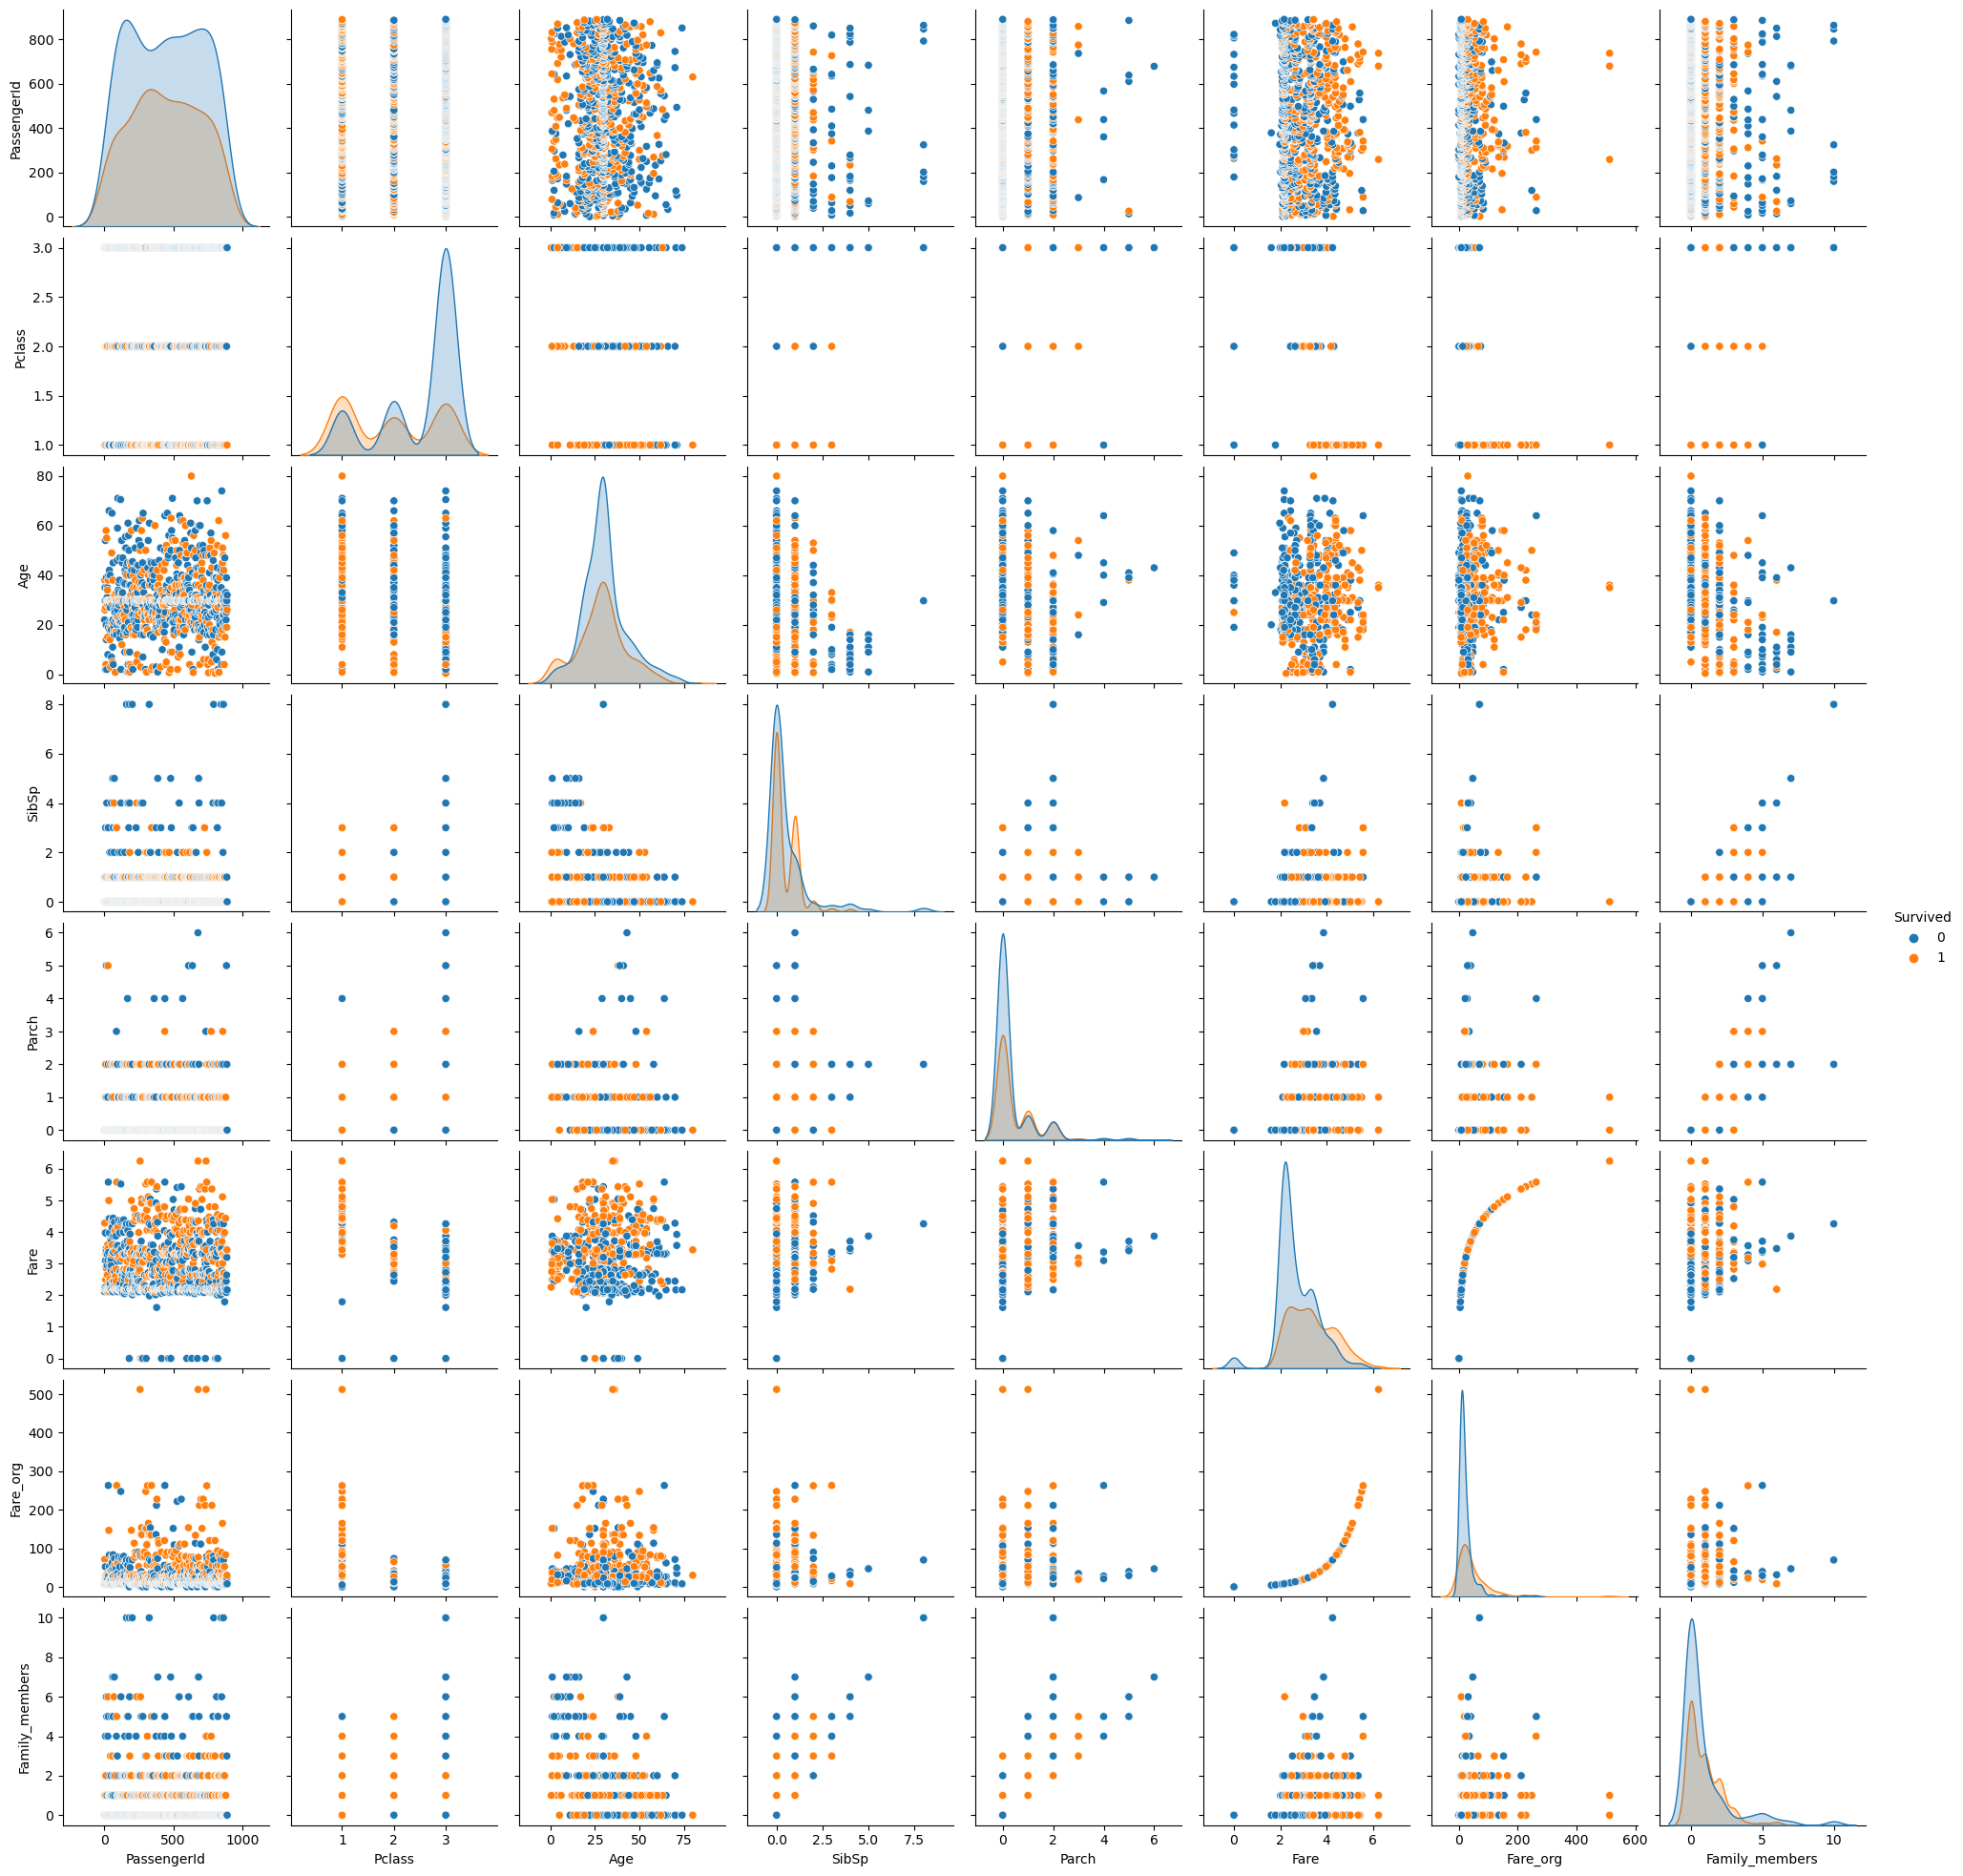

In [102]:
sns.pairplot(df, hue="Survived", height=2.5)
plt.show()

In [103]:
import seaborn as sns
sns.heatmap(df.isnull())

<AxesSubplot:>

In [104]:
sb.boxplot(x="Pclass",y="Age",data=df,palette=sb.color_palette('bright')[:3])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>